In [ ]:
#TODO: define predictions

In [2]:
#Assuming "predictions" is the predictions output from a test-datasetrun on one of our pre-trained models
# predictions is of type <class 'numpy.ndarray'>
# items in predictions are of type normalised predicted image mask


In [ ]:
# Example prediction[0]:
# "[[[0.5767955 ]
#   [0.68592864]
#   [0.7153975 ]
#   ...
#   [0.69260067]
#   [0.65477806]
#   [0.5912844 ]]

#  [[0.6563113 ]
#   [0.78651977]
#   [0.8565953 ]
#   ...
#   [0.83270615]
#   [0.78132033]
#   [0.67276055]]

#  [[0.6879388 ]
#   [0.85040265]
#   [0.90149856]
#   ...
#   [0.8783797 ]
#   [0.82976115]
#   [0.713872  ]]

#  ...

#  [[0.68368703]
#   [0.8318495 ]
#   [0.88356817]
#   ...
#   [0.99902195]
#   [0.99622256]
#   [0.9673213 ]]

#  [[0.6356805 ]
#   [0.7659723 ]
#   [0.8217161 ]
#   ...
#   [0.995688  ]
#   [0.9860314 ]
#   [0.92917943]]

#  [[0.57015115]
#   [0.64763206]
#   [0.6915854 ]
#   ...
#   [0.956753  ]
#   [0.92092645]
#   [0.82244706]]]"

In [4]:
## Making essential imports
import os
import numpy as np
import pandas as pd
import re

In [ ]:
from collections import defaultdict
from skimage.filters import threshold_otsu

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
images_folder = '/content/drive/My Drive/2years_visual_full/'

In [ ]:
def calculate_forest_cover_percentage(image):
   # Normalize the image array to the range of 0 to 1 if it's not already
    if image.max() > 1.0:
        image = image / 255.0

    # We will use Otsu's method to find a threshold that separates the forest and non-forest areas
    # Calculate Otsu's threshold
    threshold = threshold_otsu(image)

    # Apply the threshold to segment the forest areas
    forest_mask = image > threshold

    # Calculate the percentage of forest cover
    forest_cover_percentage = np.sum(forest_mask) / forest_mask.size * 100

    # Return the forest cover percentage

    return forest_cover_percentage


In [ ]:
#function to calculate return a datastructure as-
 #{
    #   <region1>:[
        #   {<year1>:<annual avg background percentage>},
        #    {<year2>:<annual avg background percentage>}, ...],
        #    <>:<> }
# input : mask_files_name - complete path to image
# input: masks_path- path to drive
# output: data structure defined
def percentage_tree_cover(img_files_name, images_path, predictions):
    # Initialize a dictionary to hold the percentage values
    region_time_data = defaultdict(lambda: defaultdict(list))

    # Process each file
    for i, img_file in enumerate(img_files_name):
        # Extract the region and time period from the file name
        region = re.search(r'mosaic_(\d+-\d+)', img_file).group(1)
        time_period = re.search(r'visual_(\d{4})', img_file).group(1)

        # Calculate the percentage of the mask that is foreground
        percentage = calculate_forest_cover_percentage(predictions[i])

        # Append the percentage to the appropriate list in the dictionary
        region_time_data[region][time_period].append(percentage)

    # # Calculate the average percentage for each region and time period
    for region, times in region_time_data.items():
        for time_period in times:
            region_time_data[region][time_period] = np.mean(times[time_period])

    return region_time_data

# Example usage:
# Define the path to the directory containing the masks
# masks_path
# list of mask file names in the directory
img_files_name = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]

# Calculate the tree cover percentages
tree_cover_data = percentage_tree_cover(img_files_name, images_folder, predictions)
print(tree_cover_data)


defaultdict(<function percentage_tree_cover.<locals>.<lambda> at 0x7a1df7a7ab00>, {'672-933': defaultdict(<class 'list'>, {'2023': 54.49180603027344, '2017': 65.45829772949219}), '673-933': defaultdict(<class 'list'>, {'2023': 67.962646484375, '2017': 75.15602111816406}), '674-933': defaultdict(<class 'list'>, {'2023': 55.54351806640625, '2017': 81.55555725097656}), '675-933': defaultdict(<class 'list'>, {'2023': 50.16136169433594, '2017': 70.70236206054688}), '676-933': defaultdict(<class 'list'>, {'2023': 52.03361511230469, '2017': 58.490753173828125}), '677-933': defaultdict(<class 'list'>, {'2023': 74.33509826660156, '2017': 82.48825073242188}), '672-932': defaultdict(<class 'list'>, {'2023': 55.66749572753906, '2017': 59.74388122558594}), '673-932': defaultdict(<class 'list'>, {'2023': 76.66435241699219, '2017': 84.06715393066406}), '674-932': defaultdict(<class 'list'>, {'2023': 88.71536254882812, '2017': 87.8082275390625}), '675-932': defaultdict(<class 'list'>, {'2023': 68.1591

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from scipy.interpolate import make_interp_spline

<Figure size 2100x1400 with 0 Axes>

Text(0.5, 1.0, 'Tree Cover Percentages Over Time by Region')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Percentage')

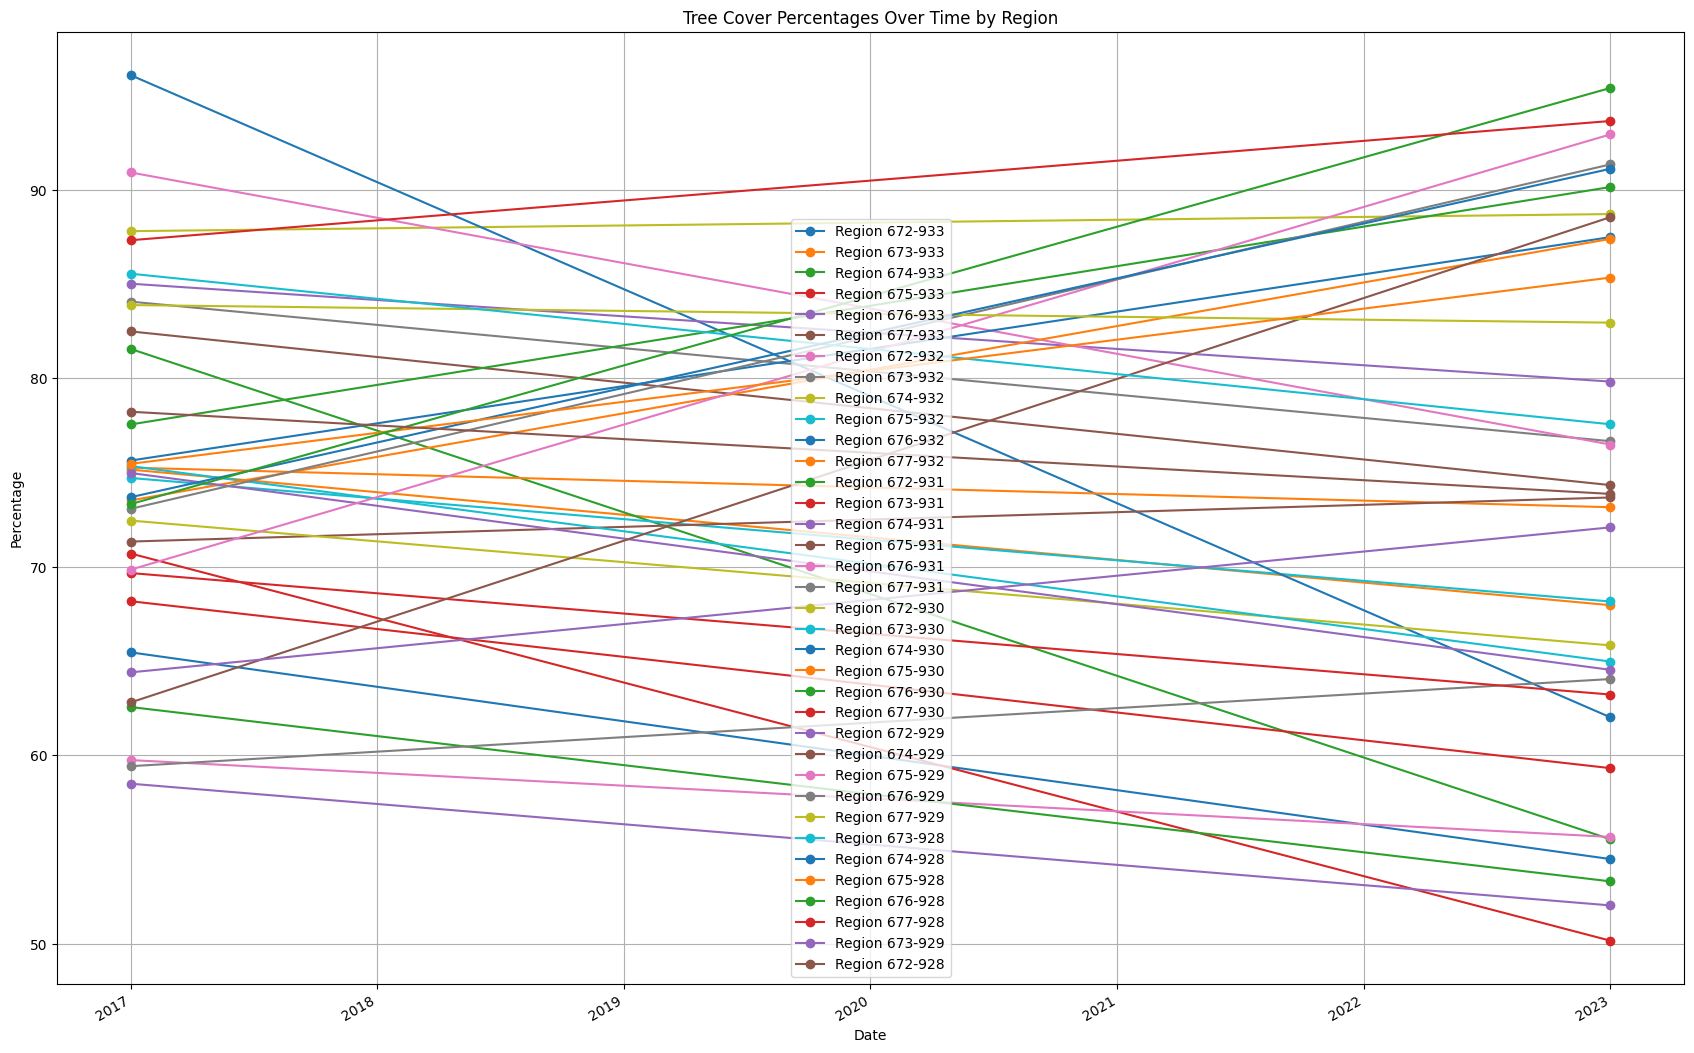

In [ ]:
%matplotlib inline

# Sample data structure containing the tree cover data
# tree_cover_data = {
#     '680-920': {'2017-06': 35.08, '2018-06': 43.56, '2019-06': 30.28, '2020-06': 20.05, '2021-06': 17.12, '2022-06': 7.27, '2023-06': 10.98},
#     '680-921': {'2017-06': 54.19, '2018-06': 66.33, '2019-06': 54.05, '2020-06': 41.20, '2021-06': 67.72, '2022-06': 32.90, '2023-06': 47.28},
#     # ... (other regions would be added here)
# }

# Prepare the figure
plt.figure(figsize=(21, 14))

# Loop through each region to plot
for region, time_data in tree_cover_data.items():
    # Sort the dates for plotting and convert them to datetime objects
    dates = [datetime.strptime(date, '%Y') for date in sorted(time_data)]
    # Get the corresponding percentages
    percentages = [time_data[date] for date in sorted(time_data)]

    # # Plot the line for this region
    plt.plot(dates, percentages, '-o', label=f'Region {region}')

    # dates_num = mdates.date2num(dates)
    # # Create a spline to interpolate the data points and smooth the line
    # spline = make_interp_spline(dates_num, percentages, k=3)  # Using a cubic spline
    # smooth_dates = np.linspace(dates_num.min(), dates_num.max(), 300)  # 300 points for smoothness
    # smooth_percentages = spline(smooth_dates)

    # # Plot the smooth line for this region
    # plt.plot(mdates.num2date(smooth_dates), smooth_percentages, label=f'Region {region}')

# Format the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels to prevent overlap
plt.legend()
plt.title('Tree Cover Percentages Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Tree Cover Percentages Decreasing Over Time by Region')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Percentage')

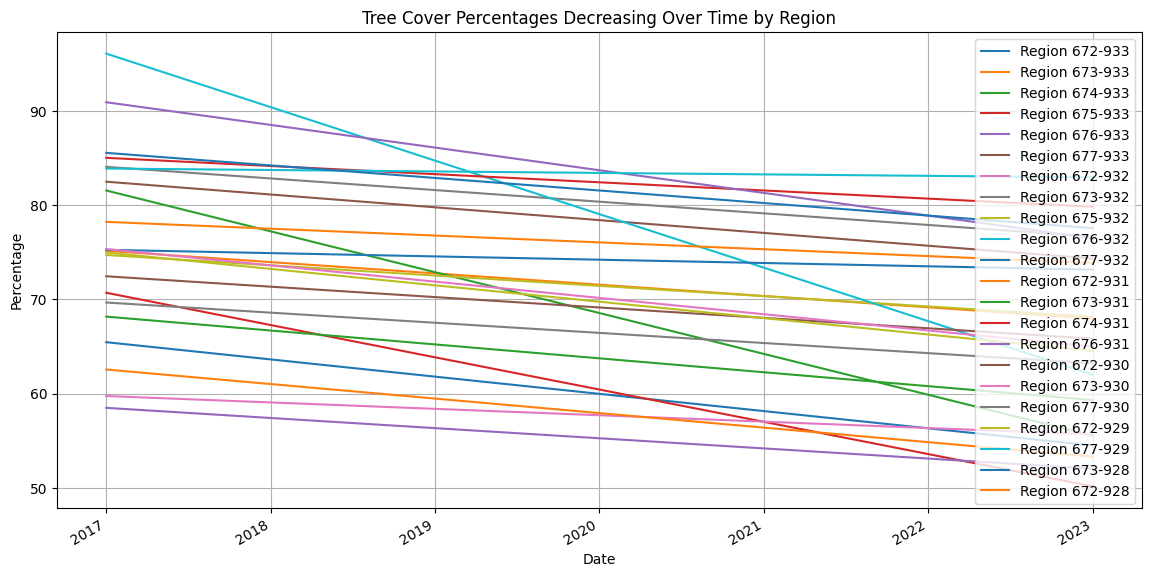

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Tree Cover Percentages Increasing Over Time by Region')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Percentage')

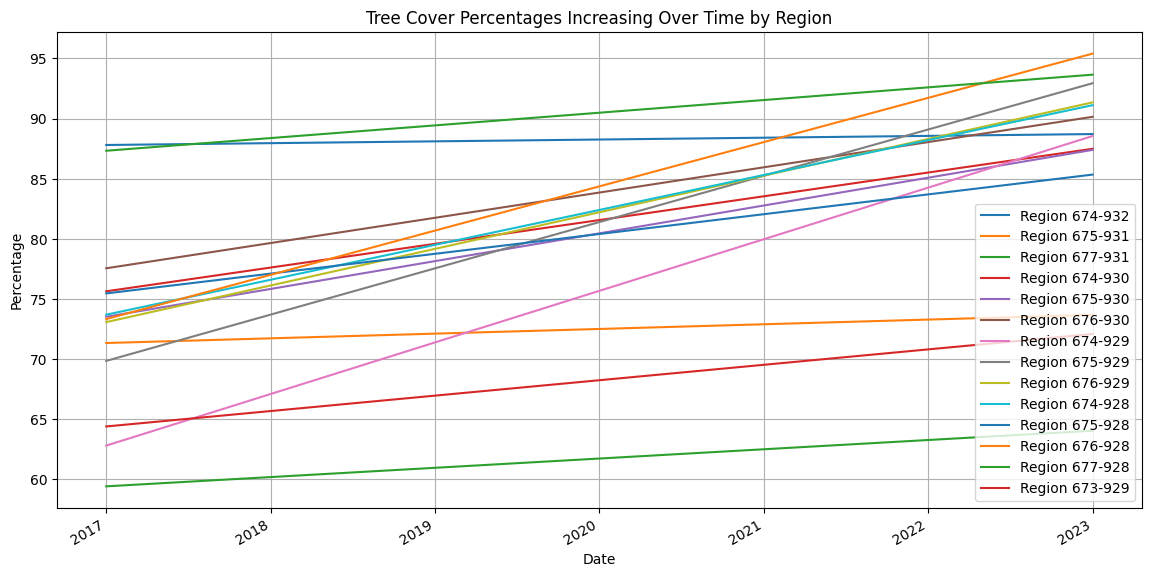

In [ ]:
# Separate the data into two groups: one where the final percentage is lower than the starting percentage
# and another where the final percentage is higher.

# Data for lines where the final value is lower than the start
decreasing_lines_data = {
    region: time_data
    for region, time_data in tree_cover_data.items()
    if time_data[sorted(time_data.keys())[-1]] < time_data[sorted(time_data.keys())[0]]
}

# Data for lines where the final value is higher than the start
increasing_lines_data = {
    region: time_data
    for region, time_data in tree_cover_data.items()
    if time_data[sorted(time_data.keys())[-1]] >= time_data[sorted(time_data.keys())[0]]
}

# Plotting the decreasing lines
plt.figure(figsize=(14, 7))
for region, time_data in decreasing_lines_data.items():
    dates = [datetime.strptime(date, '%Y') for date in sorted(time_data)]
    percentages = [time_data[date] for date in sorted(time_data)]
    # plt.plot(dates, percentages, '-o', label=f'Region {region}')

    dates_num = mdates.date2num(dates)
    # Create a spline to interpolate the data points and smooth the line
    spline = make_interp_spline(dates_num, percentages, k=1)  # Using a cubic spline
    smooth_dates = np.linspace(dates_num.min(), dates_num.max(), 300)  # 300 points for smoothness
    smooth_percentages = spline(smooth_dates)

    # Plot the smooth line for this region
    plt.plot(mdates.num2date(smooth_dates), smooth_percentages, label=f'Region {region}')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Tree Cover Percentages Decreasing Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

# Plotting the increasing lines
plt.figure(figsize=(14, 7))
for region, time_data in increasing_lines_data.items():
    dates = [datetime.strptime(date, '%Y') for date in sorted(time_data)]
    percentages = [time_data[date] for date in sorted(time_data)]
    # plt.plot(dates, percentages, '-o', label=f'Region {region}')
    dates_num = mdates.date2num(dates)
    # Create a spline to interpolate the data points and smooth the line
    spline = make_interp_spline(dates_num, percentages, k=1)  # Using a cubic spline
    smooth_dates = np.linspace(dates_num.min(), dates_num.max(), 300)  # 300 points for smoothness
    smooth_percentages = spline(smooth_dates)

    # Plot the smooth line for this region
    plt.plot(mdates.num2date(smooth_dates), smooth_percentages, label=f'Region {region}')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Tree Cover Percentages Increasing Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

